In [41]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [42]:
wp=pd.read_csv("train.csv")

In [43]:
train=wp.drop(["income"],axis=1)
label=wp["income"]

In [44]:
wp.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K
3,76,State-gov,181259,Bachelors,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7720,0,44,United-States,>50K
4,36,Self-emp-inc,115379,Masters,13,Divorced,Exec-managerial,Not-in-family,White,Male,12,0,58,United-States,<=50K


In [45]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18944 non-null  int64 
 1   workclass       18944 non-null  object
 2   fnlwgt          18944 non-null  int64 
 3   education       18944 non-null  object
 4   education-num   18944 non-null  int64 
 5   marital-status  18944 non-null  object
 6   occupation      18944 non-null  object
 7   relationship    18944 non-null  object
 8   race            18944 non-null  object
 9   sex             18944 non-null  object
 10  capital-gain    18944 non-null  int64 
 11  capital-loss    18944 non-null  int64 
 12  hours-per-week  18944 non-null  int64 
 13  native-country  18944 non-null  object
 14  income          18944 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.2+ MB


 <=50K    13517
 >50K      5427
Name: income, dtype: int64


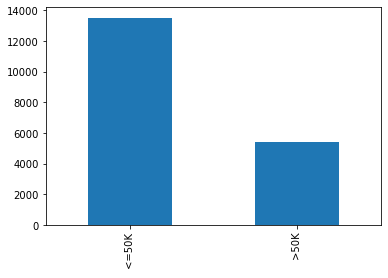

In [46]:
wp['income'].value_counts().plot(kind='bar')
print(wp["income"].value_counts())

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

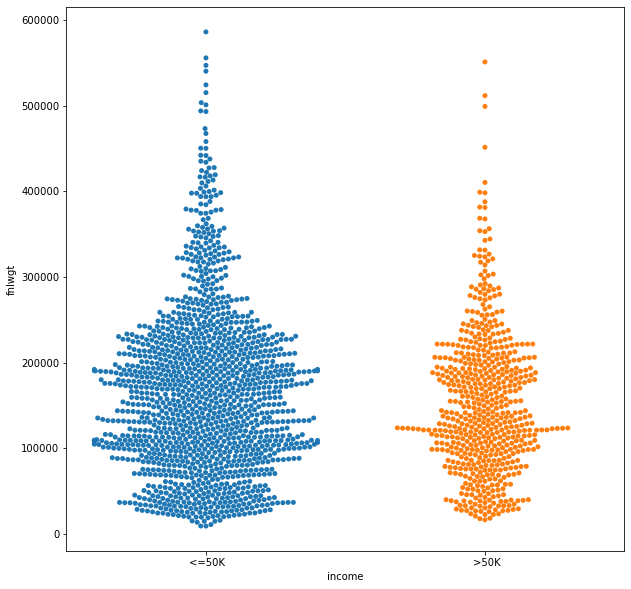

In [47]:
# sns.scatterplot(data=wp,x='age',y='capital-gain')
plt.figure(figsize=(10,10))
sns.swarmplot(x="income", y="fnlwgt", data=wp.head(2000)) # Your code here

<AxesSubplot:>

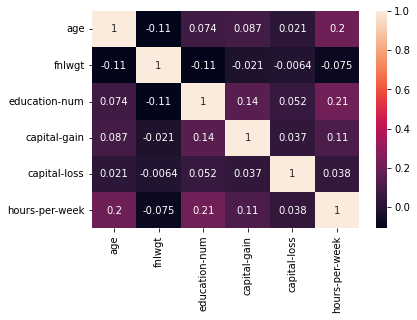

In [48]:
sns.heatmap(wp.corr(),annot=True)

# OneHot

In [49]:
s = (wp.dtypes == 'object')
object_cols = list(s[s].index)
i=(wp.dtypes == 'int64')
int_cols = list(i[i].index)
print("Categorical Columns: {}".format(object_cols))
print("Numerical Columns: {}".format(int_cols))
assert len(int_cols+object_cols)==len(wp.columns), "Another column dtype exist!!!"

Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


# Imputation to missing numerical and cateogorical values

In [50]:
def impute_by_median(df,cols: list):
    for i in cols:
        print(i)
        avg=df[i].median()
        df[i].fillna(value=avg,inplace=True)

omar.alaaeldein@ejust.edu.eg
https://www.youtube.com/watch?v=sa-TUpSx1JA

In [51]:
def impute_by_mode(df,cols: list):
    for i in cols:
        print(i)
        avg=df[i].mode()
        df[i].fillna(value=avg,inplace=True)

In [52]:
impute_by_median(train,int_cols)
impute_by_mode(train,object_cols)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
workclass
education
marital-status
occupation
relationship
race
sex
native-country
income


KeyError: 'income'